### Least-squares filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sclibrary import dataset_loader, SCPlot


sc, coordinates = dataset_loader.load_paper_data()
# create a plot
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


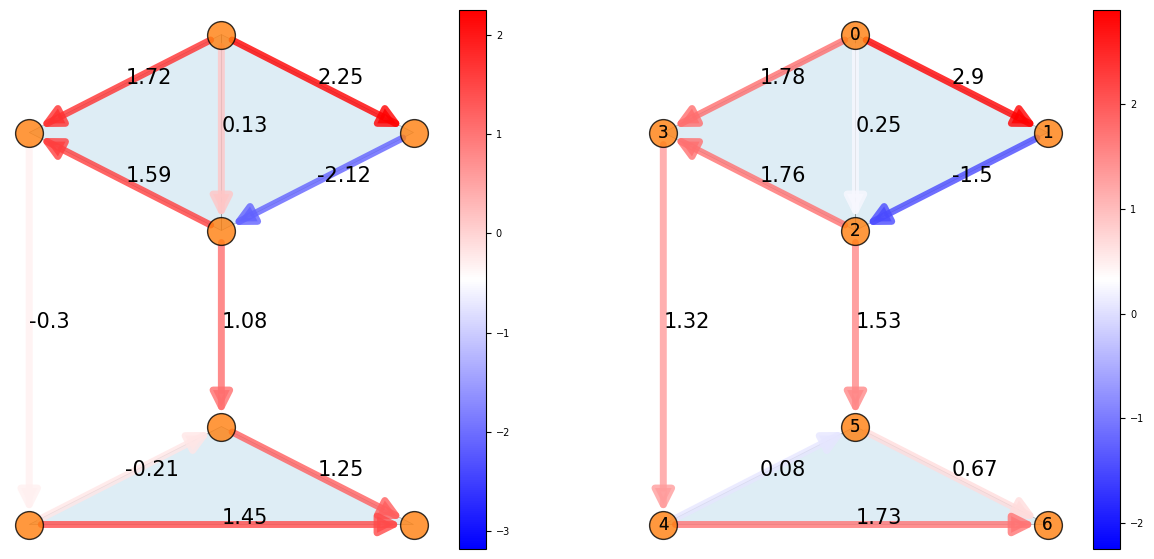

In [3]:
f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

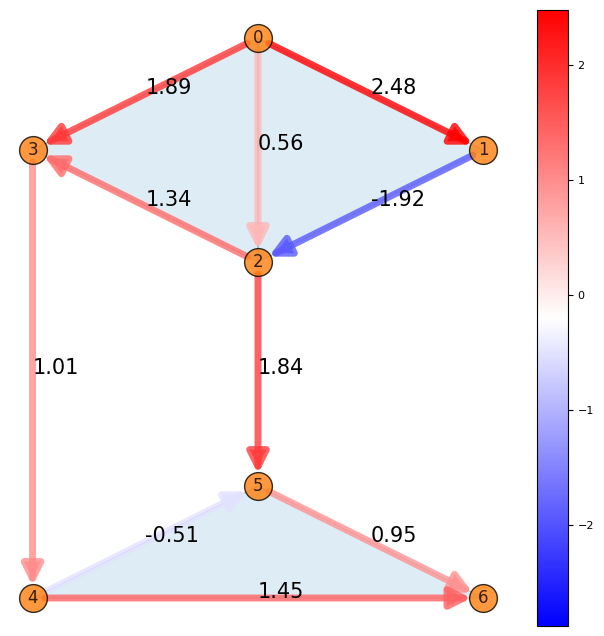

In [4]:
f_g = sc.get_hodgedecomposition(flow=f, component="gradient", round_fig=False)
scplot.draw_network(edge_flow=np.round(f_g, 2))

In [5]:
from sclibrary.filters import LSFilterDesign

lsfilter = LSFilterDesign(simplicial_complex=sc)

#### Subcomponent extraction type I - L1 = L2 = L and α = β

Filter size: 0 - Error: 0.4250482922403702
Filter size: 1 - Error: 0.4152336658972069
Filter size: 2 - Error: 0.41904808529540327
Filter size: 3 - Error: 0.41183190194199626
Error: 0.41183190194199626


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


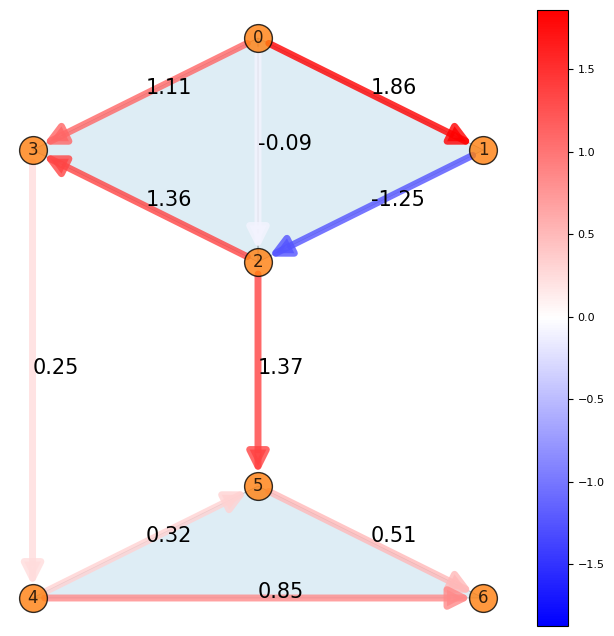

In [6]:
filter_size = 4

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f_g))

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

Filter size: 0 - Error: 0.4250482922403702
Filter size: 1 - Error: 0.4152336658972069
Filter size: 2 - Error: 0.41904808529540366
Filter size: 3 - Error: 0.41183190194200425
Filter size: 4 - Error: 0.3775256620142961
Filter size: 5 - Error: 0.35230542385016483
Filter size: 6 - Error: 0.36601414920787495
Filter size: 7 - Error: 0.3681407034445634
Filter size: 8 - Error: 0.10490222631868927
Filter size: 9 - Error: 1.062062399925624e-05
Filter size: 10 - Error: 2.4723031534416504e-05
Filter size: 11 - Error: 5.284141688909869e-05
Filter size: 12 - Error: 0.00010539275668849616
Filter size: 13 - Error: 0.00020979025343421844
Filter size: 14 - Error: 0.0004230970933725002
Filter size: 15 - Error: 0.0009038249766491055
Filter size: 0 - Error: 1.6043606226735492
Filter size: 1 - Error: 1.6240543685705808
Filter size: 2 - Error: 1.7614748067357553
Filter size: 3 - Error: 1.7488750998029412
Filter size: 4 - Error: 1.7329971070291554
Filter size: 5 - Error: 1.6787835982394956
Filter size: 6 - Er

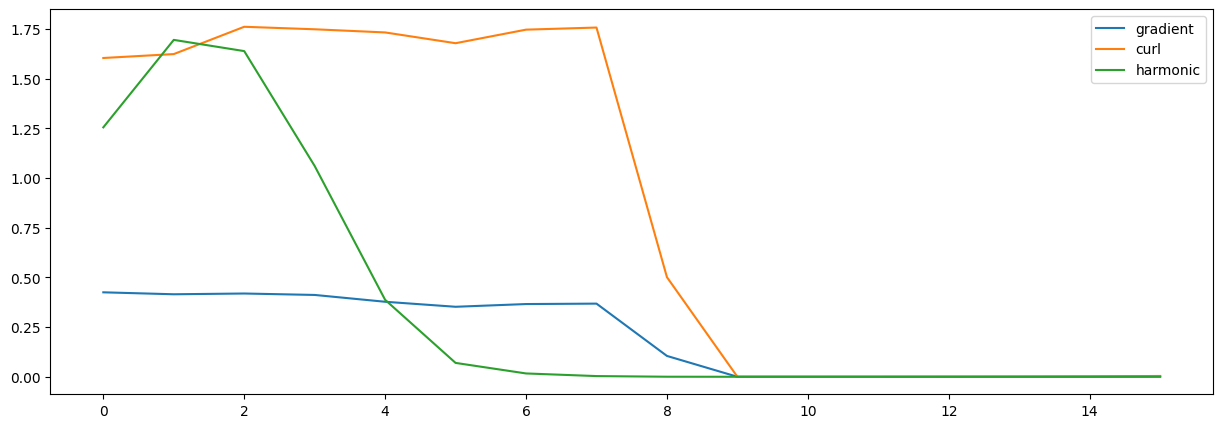

In [12]:
import matplotlib.pyplot as plt

filter_size = 16
plt.figure(figsize=(15, 5))

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"], label="gradient")

# curl
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="curl", f=f,
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"], label="curl")

# harmonic 
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="harmonic", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["error_per_filter_size"], label="harmonic")

plt.legend()

#### Subcomponent extraction type II - L1 != L2 and α != β

Filter size: 0 - Error: 0.25016749791524423
Filter size: 1 - Error: 0.24109540112283112
Filter size: 2 - Error: 0.20246224920061975
Filter size: 3 - Error: 0.11576740315545098
Filter size: 4 - Error: 0.03977124163267346
Filter size: 5 - Error: 0.00318458967302696
Filter size: 6 - Error: 6.443112658563588e-09
Filter size: 7 - Error: 2.7515058434680236e-08
Filter size: 8 - Error: 1.3601242300242054e-07
Filter size: 9 - Error: 6.638908392381985e-07
Filter size: 10 - Error: 3.14299594131333e-06
Filter size: 11 - Error: 1.4510307449935379e-05
Filter size: 12 - Error: 6.580779116773762e-05
Filter size: 13 - Error: 0.0002948088385260714
Error: 0.0002948088385260714


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


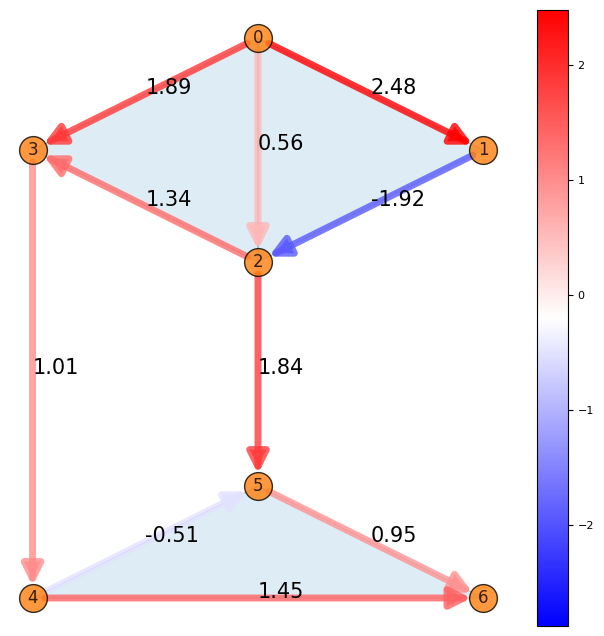

In [7]:
filter_range = 14

lsfilter.subcomponent_extraction_type_two(
    L=filter_range, component="gradient", f=f
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f_g))

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

#### General Filter

Filter size: 0 - Error: 0.25016749791524423
Filter size: 0 - Error: 3.6176416762041423
Error: 0.25016749791524423


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


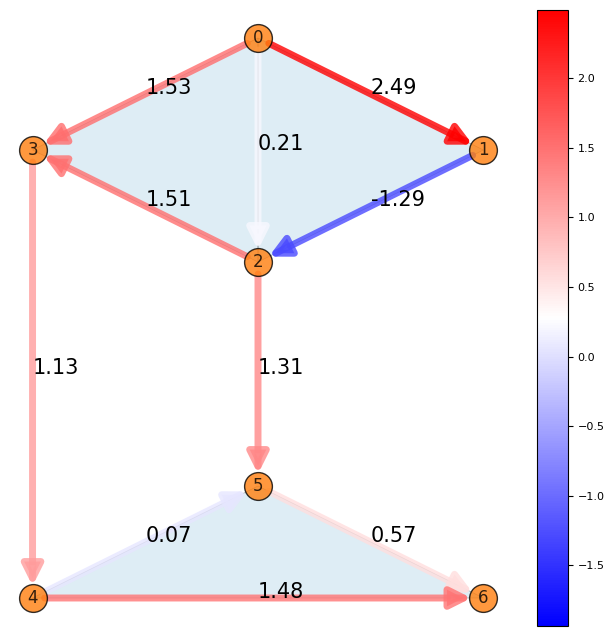

In [8]:
lsfilter = LSFilterDesign(simplicial_complex=sc)

f_est_h, f_est_c, f_est_g = lsfilter.general_filter(
    L1 = 1, L2 = 1, f=f,
)

print("Error:", lsfilter.calculate_error(f_est_g, f_g))

scplot.draw_network(edge_flow=np.round(f_est_g, 2))

In [9]:
lsfilter.history

{'L1': {'filter': array([[0.85714286, 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.85714286, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.85714286, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.85714286, 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.85714286,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.85714286, 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.85714286, 0.        , 0.        , 0.        